# 1. tensorflow v2.xx에서 v1 사용하기

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2비활성화하고 v1을 활성화

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 그래프 정의 (tensor객체의 흐름)
- sess = tf.Session()을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [2]:
# tensor = data(상수,변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [3]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1,node2,node3]))

[10.0, 20.0, 30.0]


In [4]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [5]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3., 4.])
m = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)

2.5

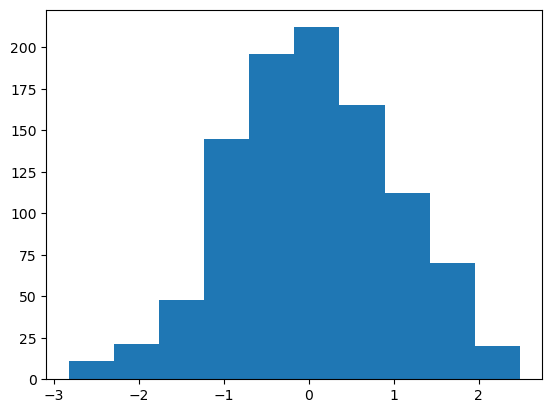

In [6]:
# tf.random_normal([size]) : 평균0이고, 표준편차가 1인 난수 size 개 발생. 난수갯수:독립변수갯수
import matplotlib.pyplot as plt
tensor=tf.random_normal([1000]) # 평균0, 표준편차가 1인 난수 2
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [7]:
# tensor 그래프(객체 흐름) 정의
# data set(x, y)
x = np.array([1,2,3])
y = np.array([1,2,3])

# weight와 bias (처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]),name='wieght')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x + b

# cost function (손실함수 = mse : 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습 목적 :cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()

# 변수(W, b) 초기화
sess.run(tf.global_variables_initializer())

# 6000번 학습 (v2에서의 fit함수)
for step in range(6000):
    _, cost_val, W_val, b_val=sess.run([train,cost,W,b])
    if step%300 == 0:
        print('{}번째 cost:{}, W={}, b:{}'.format(step,
                                                cost_val,
                                                W_val,
                                                b_val))

0번째 cost:17.003135681152344, W=[-0.597252], b:[-0.7173149]
300번째 cost:5.121897629578598e-06, W=[1.0026287], b:[-0.00597528]
600번째 cost:1.2091480812159716e-06, W=[1.0012772], b:[-0.00290319]
900번째 cost:2.857797198885237e-07, W=[1.0006208], b:[-0.00141144]
1200번째 cost:6.773881722210717e-08, W=[1.0003027], b:[-0.00068709]
1500번째 cost:1.6133613556235105e-08, W=[1.0001478], b:[-0.00033522]
1800번째 cost:3.81871778643017e-09, W=[1.0000719], b:[-0.00016321]
2100번째 cost:9.112107179909401e-10, W=[1.0000348], b:[-7.978817e-05]
2400번째 cost:2.1924689841412714e-10, W=[1.0000173], b:[-3.893261e-05]
2700번째 cost:6.695622528640754e-11, W=[1.0000098], b:[-2.1354124e-05]
3000번째 cost:2.864176951167252e-11, W=[1.0000066], b:[-1.3781184e-05]
3300번째 cost:1.722334774800771e-11, W=[1.0000051], b:[-1.0544409e-05]
3600번째 cost:1.3732089250428903e-11, W=[1.0000045], b:[-9.287443e-06]
3900번째 cost:1.3323502023876443e-11, W=[1.0000044], b:[-8.867204e-06]
4200번째 cost:1.332346472732171e-11, W=[1.0000044], b:[-8.861246e-0

In [8]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([1.0000044], dtype=float32), array([-8.861246e-06], dtype=float32)]

In [9]:
W_, b_ = sess.run([W, b])
W_, b_

(array([1.0000044], dtype=float32), array([-8.861246e-06], dtype=float32))

In [10]:
print('최종 회귀식 : H = {}*x + {}'.format(W_[0], b_[0]))

최종 회귀식 : H = 1.0000044107437134*x + -8.861245987645816e-06


In [11]:
def to_predict(x):
    return W_[0]*x + b_[0]    

In [12]:
to_predict(3)

3.0000043709851525

## 2.2 predict을 하기 위한 placeholder 이용
- placeholder : 외부에서 데이터를 입력받을 수 있는 노드

In [13]:
a = tf.placeholder(tf.float16)
b = tf.placeholder(tf.float16)
ab = tf.add(a, b)
sess = tf.Session()
sess.run([a,b,ab], feed_dict={a : 10,
                        b : 20})

[array(10., dtype=float16), array(20., dtype=float16), 30.0]

In [14]:
sess.run(ab, feed_dict={a:np.array([1,2,3]),
                       b:np.array([1,2,3]) })

array([2., 4., 6.], dtype=float16)

In [15]:
# data set (H = 2x + 1)
x_data = np.array([1,2,3,5])
y_data = np.array([3,5,7,11])

# placeholder 설정(x,y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),name='wieght')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x + b

# cost function == loss function
cost = tf.reduce_mean(tf.square(H-y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 생성 & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 6000번 학습
for step in range(6000):
    _, cost_val, W_val, b_val=sess.run([train,cost,W,b],
                                      feed_dict={x:x_data,
                                                y:y_data})
    if step%300 == 0:
        print('{}/6000번째 cost:{}, W={}, b:{}'.format(step+1,
                                                     cost_val,
                                                     W_val,
                                                     b_val))

1/6000번째 cost:117.66902923583984, W=[-1.3807825], b:[0.67080283]
301/6000번째 cost:0.006576424464583397, W=[1.950701], b:[1.1710676]
601/6000번째 cost:0.0005424719420261681, W=[1.9858409], b:[1.0491316]
901/6000번째 cost:4.4748558138962835e-05, W=[1.9959333], b:[1.0141114]
1201/6000번째 cost:3.6923443076375406e-06, W=[1.9988319], b:[1.0040535]
1501/6000번째 cost:3.048332359867345e-07, W=[1.9996643], b:[1.0011649]
1801/6000번째 cost:2.5271333470300306e-08, W=[1.9999033], b:[1.0003351]
2101/6000번째 cost:2.138634158654895e-09, W=[1.999972], b:[1.0000974]
2401/6000번째 cost:2.0474999473663047e-10, W=[1.9999912], b:[1.0000304]
2701/6000번째 cost:6.59952092973981e-11, W=[1.9999949], b:[1.0000172]
3001/6000번째 cost:6.59952092973981e-11, W=[1.9999949], b:[1.0000172]
3301/6000번째 cost:6.59952092973981e-11, W=[1.9999949], b:[1.0000172]
3601/6000번째 cost:6.59952092973981e-11, W=[1.9999949], b:[1.0000172]
3901/6000번째 cost:6.59952092973981e-11, W=[1.9999949], b:[1.0000172]
4201/6000번째 cost:6.59952092973981e-11, W=[1.9

In [16]:
# 최종 W, b
sess.run([W, b])

[array([1.9999949], dtype=float32), array([1.0000172], dtype=float32)]

In [17]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([10.999991], dtype=float32)

In [18]:
sess.run(H, feed_dict={x: np.array([5,6,7])})

array([10.999991, 12.999987, 14.999981], dtype=float32)

## 2.3 scale 이 다른 데이터들의 linear regression

In [19]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
H = W*x+b

#cost function(loss function : 손실함수)
cost = tf.reduce_mean(tf.square(H-y))

#경사하강법
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,6001):
    _, cost_val, W_val, b_val=sess.run([train,cost,W,b],
                                      feed_dict={x:x_data,
                                                y:y_data})
    if step%300 == 1:
        print('{}/6000번째 cost:{}, W={}, b:{}'.format(step,
                                                     cost_val,
                                                     W_val,
                                                     b_val))

1/6000번째 cost:3588.22705078125, W=[0.4625033], b:[1.1726267]
301/6000번째 cost:111.28271484375, W=[8.941738], b:[2.2697623]
601/6000번째 cost:81.40166473388672, W=[9.732517], b:[2.3293707]
901/6000번째 cost:81.07579040527344, W=[9.811306], b:[2.293656]
1201/6000번째 cost:81.00572204589844, W=[9.824071], b:[2.2498405]
1501/6000번째 cost:80.94021606445312, W=[9.830612], b:[2.2059982]
1801/6000번째 cost:80.87702178955078, W=[9.836479], b:[2.162859]
2101/6000번째 cost:80.81604766845703, W=[9.842202], b:[2.120487]
2401/6000번째 cost:80.7572021484375, W=[9.84786], b:[2.0788534]
2701/6000번째 cost:80.70047760009766, W=[9.853342], b:[2.0379605]
3001/6000번째 cost:80.64570617675781, W=[9.858778], b:[1.9978001]
3301/6000번째 cost:80.59281921386719, W=[9.864136], b:[1.9583367]
3601/6000번째 cost:80.54183959960938, W=[9.86933], b:[1.9195788]
3901/6000번째 cost:80.49263000488281, W=[9.87448], b:[1.8815138]
4201/6000번째 cost:80.44515228271484, W=[9.879567], b:[1.8441097]
4501/6000번째 cost:80.39933776855469, W=[9.884491], b:[1.

In [20]:
# 예측
sess.run(H, feed_dict={x:5})

array([51.17341], dtype=float32)

In [21]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터들의 linear regression을 구현(조정 O)
### scale을 맞추는 방법 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 데이터의 최대값을 1, 최소값을 0으로 조정
```
                      x - Xmin
    normalization = ───────
                    Xmax - Xmin
        * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.MinMaxScaler이용)
```
- standardization(표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
```
                        x - Xmean(평균)
    standardization = ──────────
                        Xstd(표준편차)
        * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.StandardScaler이용)
```


In [22]:
# 라이브러리를 쓰지 않고 정규화 : 예측할 경우 x데이터의 스케일을하고, 스케일된 예측값을 변환
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

scaled_x_data = (x_data - x_data.min())/(x_data.max()-x_data.min())
scaled_y_data = (y_data - y_data.min())/(y_data.max()-y_data.min())

print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.11111111 0.7        0.83333333 1.        ]


In [23]:
# sklearn.preprocessing.MinMaxScaler이용
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 표준화 시킬 객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)

scaler_y = MinMaxScaler() # y_data를 표준화 시킬 객체
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)

np.column_stack([x_data, scaled_x_data, y_data, scaled_y_data])

array([[ 1.        ,  0.        ,  5.        ,  0.        ],
       [ 2.        ,  0.11111111, 15.        ,  0.11111111],
       [ 5.        ,  0.44444444, 68.        ,  0.7       ],
       [ 8.        ,  0.77777778, 80.        ,  0.83333333],
       [10.        ,  1.        , 95.        ,  1.        ]])

In [24]:
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x+b

#cost function(loss function : 손실함수)
cost = tf.reduce_mean(tf.square(H-y))

#경사하강법
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,10001):
    _, cost_val, W_val, b_val=sess.run([train,cost,W,b],
                                      feed_dict={x:scaled_x_data,
                                                y:scaled_y_data})
    if step%300 == 1:
        print('{}/10000번째 cost:{}, W={}, b:{}'.format(step,
                                                     cost_val,
                                                     W_val,
                                                     b_val))

1/10000번째 cost:7.723258972167969, W=[-2.450394], b:[-0.7707421]
301/10000번째 cost:2.2750802040100098, W=[-1.7122275], b:[0.23950072]
601/10000번째 cost:0.9861041903495789, W=[-1.2896256], b:[0.67844033]
901/10000번째 cost:0.6365436315536499, W=[-1.0212213], b:[0.84981954]
1201/10000번째 cost:0.5050833225250244, W=[-0.8303701], b:[0.8971074]
1501/10000번째 cost:0.42935237288475037, W=[-0.6805098], b:[0.88798916]
1801/10000번째 cost:0.3721291720867157, W=[-0.5540576], b:[0.8543212]
2101/10000번째 cost:0.3243013024330139, W=[-0.44242886], b:[0.8110243]
2401/10000번째 cost:0.28314444422721863, W=[-0.34130847], b:[0.76502216]
2701/10000번째 cost:0.24745330214500427, W=[-0.24842079], b:[0.7194628]
3001/10000번째 cost:0.21643981337547302, W=[-0.16246822], b:[0.67572033]
3301/10000번째 cost:0.1894770711660385, W=[-0.08263241], b:[0.6343355]
3601/10000번째 cost:0.16603286564350128, W=[-0.00833475], b:[0.59546304]
3901/10000번째 cost:0.145647332072258, W=[0.060877], b:[0.5590815]
4201/10000번째 cost:0.12792131304740906, W

In [25]:
# 예측
scaled_input=scaler_x.transform(np.array([[2]]))
print('2를 스케일 조정된 값 :',scaled_input)
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('예측값 :', scaler_y.inverse_transform(scaled_output))

2를 스케일 조정된 값 : [[0.11111111]]
예측값 : [[28.743639]]


In [26]:
sess.run([W,b])

[array([0.78540766], dtype=float32), array([0.1765507], dtype=float32)]

In [27]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
np.column_stack([y_data, y_hat])

array([[ 5.        , 20.88956261],
       [15.        , 28.74363899],
       [68.        , 52.30587006],
       [80.        , 75.86810303],
       [95.        , 91.57624817]])

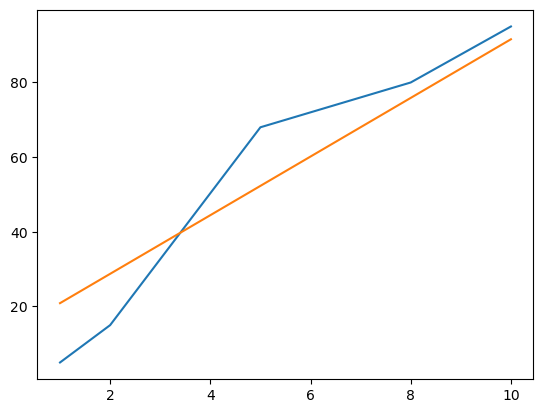

In [28]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.plot(x_data, y_hat)

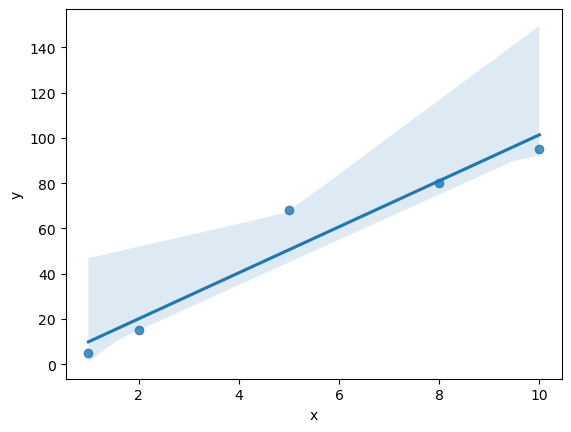

In [29]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':x_data[:,0],
                  'y':y_data[:,0]})
sns.regplot(data=df, x='x', y='y')
plt.show()

In [30]:
# 라이브러리를 쓰지 않고 표준화
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
scaled_x_data = (x_data - x_data.mean())/x_data.std()
scaled_y_data = (y_data - y_data.mean())/y_data.std()
print(scaled_x_data,scaled_y_data)

[-1.22474487 -0.93313895 -0.05832118  0.81649658  1.39970842] [-1.32373476 -1.04563922  0.42826713  0.76198177  1.17912508]


In [31]:
# 라이브러리를 써서 표준화
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)
print(np.column_stack([x_data, scaled_x_data]))
print(np.column_stack([y_data, scaled_y_data]))

[[ 1.         -1.22474487]
 [ 2.         -0.93313895]
 [ 5.         -0.05832118]
 [ 8.          0.81649658]
 [10.          1.39970842]]
[[ 5.         -1.32373476]
 [15.         -1.04563922]
 [68.          0.42826713]
 [80.          0.76198177]
 [95.          1.17912508]]


In [32]:
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x+b

#cost function(loss function : 손실함수)
cost = tf.reduce_mean(tf.square(H-y))

#경사하강법
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,10001):
    _, cost_val, W_val, b_val=sess.run([train,cost,W,b],
                                      feed_dict={x:scaled_x_data,
                                                y:scaled_y_data})
    if step%1000 == 1:
        print('{}/10000번째 cost:{}, W={}, b:{}'.format(step,
                                                     cost_val,
                                                     W_val,
                                                     b_val))

1/10000번째 cost:2.356870174407959, W=[-0.12762445], b:[1.0455945]
1001/10000번째 cost:0.10308259725570679, W=[0.8208115], b:[0.14122263]
2001/10000번째 cost:0.061968136578798294, W=[0.9489114], b:[0.01907419]
3001/10000번째 cost:0.06121812015771866, W=[0.966213], b:[0.00257625]
4001/10000번째 cost:0.06120443344116211, W=[0.9685498], b:[0.00034796]
5001/10000번째 cost:0.061204176396131516, W=[0.9688653], b:[4.699855e-05]
6001/10000번째 cost:0.061204176396131516, W=[0.9688999], b:[6.353086e-06]
7001/10000번째 cost:0.06120417267084122, W=[0.9688999], b:[8.6503474e-07]
8001/10000번째 cost:0.061204176396131516, W=[0.9688999], b:[1.2772458e-07]
9001/10000번째 cost:0.061204176396131516, W=[0.9688999], b:[3.557435e-08]


In [33]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
np.column_stack([y_data, y_hat])

array([[  5.        ,   9.92922401],
       [ 15.        ,  20.08893394],
       [ 68.        ,  50.56805801],
       [ 80.        ,  81.04718018],
       [ 95.        , 101.36660004]])

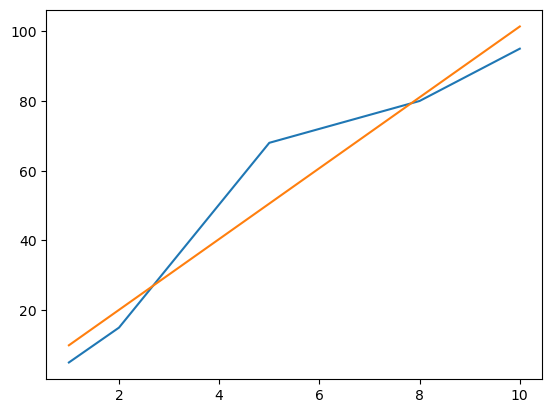

In [34]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.plot(x_data, y_hat)

전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv (지역명, 평당분양가격, 연도, 월)
- 지역명2 : 지역명필드는 라벨인코딩하여 추가
- 평당분양가격n : 평당분양가격의 정규화 스케일 조정하여 추가
- 평당분양가격s : 평당분양가격의 표준화 스케일 조정하여 추가
- 연도n : 연도의 정규화 스케일 조정하여 추가
- 연도s : 연도의 표준화 스케일 조정하여 추가
- 월n : 월의 정규화 스케일 조정하여 추가
- 월s : 월의 정규화 스케일 조정하여 추가

In [7]:
import pandas as pd
df = pd.read_csv(r'D:\ai\Downloads\shareData\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
new_df = df.melt(id_vars='지역', var_name='연도월', value_name='평당분양가격')
new_df['연도']=new_df['연도월'].apply(lambda x : int(x.split('년')[0]))
new_df['월']=new_df['연도월'].apply(lambda x : int(x.split('년')[1][:-1]))
new_df.drop('연도월',axis=1,inplace=True)
new_df=new_df.rename(columns={'지역':'지역명'})
new_df.head(2)

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df['지역명2'] = le.fit_transform(new_df['지역명'])

In [3]:
from sklearn.preprocessing import MinMaxScaler

price_data = np.array(new_df['평당분양가격']).reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(price_data)
price_scaled_data = scaler.transform(price_data)
new_df['평당분양가격n'] = price_scaled_data

year_data = np.array(new_df['연도']).reshape(-1, 1)
scaler.fit(year_data)
year_scaled_data = scaler.transform(year_data)
new_df['연도n'] = year_scaled_data

month_data = np.array(new_df['월']).reshape(-1, 1)
scaler.fit(month_data)
month_scaled_data = scaler.transform(month_data)
new_df['월n'] = month_scaled_data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
price_data = np.array(new_df['평당분양가격']).reshape(-1, 1)
scaler.fit(price_data)
price_scaled_data = scaler.transform(price_data)
new_df['평당분양가격s'] = price_scaled_data

year_data = np.array(new_df['연도']).reshape(-1, 1)
scaler.fit(year_data)
year_scaled_data = scaler.transform(year_data)
new_df['연도s'] = year_scaled_data

month_data = np.array(new_df['월']).reshape(-1, 1)
scaler.fit(month_data)
month_scaled_data = scaler.transform(month_data)
new_df['월s'] = month_scaled_data

NameError: name 'np' is not defined

In [ ]:
new_df.to_csv(r'D:\ai\Downloads\shareData\전국 평당분양가격_scaling.csv', encoding='cp949')

In [ ]:
def scaling(df,column):
    data = np.array(df[column])
    scaled_data=(data-data.min())/(data.max()-data.min())
    df[column+'n']=scaled_data
scaling(new_df,'평당분양가격')
scaling(new_df,'연도')
scaling(new_df,'월')

def scaling(df,column):
    data = np.array(df[column])
    scaled_data=(data-data.mean())/data.std()
    df[column+'s']=scaled_data
scaling(new_df,'평당분양가격')
scaling(new_df,'연도')
scaling(new_df,'월')
new_df

In [9]:
# 변수들 전체 스케일 조정
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
new_df[['연도n','월n','평당분양가격n']] = scaler.fit_transform(new_df[['연도','월','평당분양가격']])
new_df.sample(10)

,지역명,평당분양가격,연도,월,연도n,월n,평당분양가격n
81,전남,5736,2014,4,0.5,0.272727,0.008432
332,강원,7019,2015,7,1.0,0.545455,0.093619
191,광주,7752,2014,11,0.5,0.909091,0.142288
14,경북,6168,2013,12,0.0,1.000000,0.037116
92,경기,10646,2014,5,0.5,0.363636,0.334440
252,경북,6953,2015,2,1.0,0.090909,0.089237
233,전북,6583,2015,1,1.0,0.000000,0.064670
328,대전,8079,2015,7,1.0,0.545455,0.164000
223,대구,8327,2015,1,1.0,0.000000,0.180466
246,세종,8560,2015,2,1.0,0.090909,0.195937


## 2.5 독립변수 x가 여러개인 linear Regression

In [18]:
# data set
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152], [185], [180], [196], [142]])
# tensor graph 정의
# shape=[None, 3] : x_data([5,3]도 받고, 예측할때는 [1,3]. 3열만 고정)
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# weight & bias (weight 3개, bias 1개)
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bais')
# Hypothesis
# H = X@W + b : tf.matmul(X, W) 행렬 곱
H = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(H-Y))
#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)
# session 생성과 Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 40001):
    _, cost_val = sess.run([train, cost],
                          feed_dict={X:x_data,
                                    Y:y_data})
    if step%5000==1:
        print('{}번째 cost:{}'.format(step, cost_val))
print('최종 cost:{}'.format(cost_val))

1번째 cost:27919.0625
5001번째 cost:1.1186866760253906
10001번째 cost:0.656325101852417
15001번째 cost:0.5318796038627625
20001번째 cost:0.45008769631385803
25001번째 cost:0.38698452711105347
30001번째 cost:0.337523877620697
35001번째 cost:0.29871422052383423
최종 cost:0.26827794313430786


In [19]:
#예측
sess.run(H, feed_dict={X: np.array([[73,80,77],
                                   [73,80,72]])})

array([[152.27824],
       [151.19969]], dtype=float32)

## csv를 array로 읽어오기

In [20]:
# 방법1
# 1. csv를 dataFrame 읽어와
data = pd.read_csv('data/ozone.csv')
# 2. 결측치 대체 or 삭제
# data.fillna(value=data.mean(), inplace=True)
data.dropna(how='any', axis=0, inplace=True)
X = data[['Ozone','Solar.R','Wind','Temp']].values
y = data['Ozone'].values
X.shape, y.shape

((111, 4), (111,))

In [22]:
# 방법2 : csv -> 넘파이배열
# data = np.loadtxt('data/ozone_nonan.csv', delimiter=',') NAN이 없어야 함
data = np.genfromtxt('data/ozone_nonan.csv', delimiter=',', skip_header=1, missing_values='NA', filling_values=np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [25]:
# csv파일 -> 데이터프레임 -> 결측치 -> 넘파이 배열 -> 머신러닝
# import statsmodels.api as sm
# sm.datasets.get_rdataset('airquality').data
data = pd.read_csv('data/ozone.csv')
data.info() # 결측치

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [30]:
data.mean(axis=0) # 열별 평균

Ozone       42.129310
Solar.R    185.931507
Wind         9.957516
Temp        77.882353
Month        6.993464
Day         15.803922
dtype: float64

In [40]:
# 결측치 처리 방법 1 : 결측치 행을 제거
# data.dropna(how='any', axis=0).shape # axis=0 : 기본값 생략가능. 결측치가 한열이라도 있는 행 삭제
# 결측치 처리 방법2 : 열별 평균값으로 대체
# data.fillna(value=data.mean())
# 결측치 처리 방법3 : 열별 월별 평균값으로 대체
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
mean_data.loc[5, 'Ozone']

23.615384615384617

In [45]:
def fill_nan(row):
    "row['Ozone']과 row['Solar.R']값이 결측치면 mean_data[월, 열이름]으로 대체"
    # pd.options.mode.copy_on_write = True
    row = row.copy()
    if row.isna()['Ozone'] :
        row['Ozone'] = mean_data.loc[row['Month'], 'Ozone']
    if row.isna()['Solar.R'] :
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']
    return row    
# fill_nan(data.loc[4]), data.loc[4]
data = data.apply(fill_nan,axis=1)
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]
data.head()

,Ozone,Solar.R,Wind,Temp
0,41.000000,190.000000,7.4,67.0
1,36.000000,118.000000,8.0,72.0
2,12.000000,149.000000,12.6,74.0
3,18.000000,313.000000,11.5,62.0
4,23.615385,181.296296,14.3,56.0


In [87]:
# 독립변수 & 종속변수 (values:판다스 데이터를 넘파이배열로 )
x_data = data[['Solar.R','Wind','Temp']].values
x_data = data.iloc[:, 1:].values
y_data = data['Ozone'].values.reshape(-1,1)
y_data = data[['Ozone']].values
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 종속변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
H = tf.matmul(X,W)+b
# 4. cost함수=loss함수=손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W,b 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(40001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data,
                                                    y : y_data})
    if step%2000==1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}, W:{}, b:{}'.format(cost_val, sess.run(W),sess.run(b)))

1번째 cost : 2996.902099609375
2001번째 cost : 516.539306640625
4001번째 cost : 475.32281494140625
6001번째 cost : 464.95367431640625
8001번째 cost : 462.33538818359375
10001번째 cost : 461.66461181640625
12001번째 cost : 461.48309326171875
14001번째 cost : 461.42462158203125
16001번째 cost : 461.3970031738281
18001번째 cost : 461.3772888183594
20001번째 cost : 461.359375
22001번째 cost : 461.3420104980469
24001번째 cost : 461.32476806640625
26001번째 cost : 461.3075866699219
28001번째 cost : 461.29034423828125
30001번째 cost : 461.2730712890625
32001번째 cost : 461.25592041015625
34001번째 cost : 461.23870849609375
36001번째 cost : 461.2214660644531
38001번째 cost : 461.2042541503906
최종 cost : 461.18719482421875, W:[[ 0.05531011]
 [-3.5701594 ]
 [ 0.8712127 ]], b:[-1.2509068]


In [88]:
input_data = np.array([[118, 8, 72]])
predict_data = sess.run(H, feed_dict={X : input_data})
predict_data

array([[39.441727]], dtype=float32)

In [102]:
# MinMaxScaler 나 StandardScaler을 이용하여 스케일 조정 후 tensorflow 수행
# 주로 0~1사이     주로 0근처
data = pd.read_csv('data/ozone.csv')
# 결측치 처리
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
mean_data.loc[5, 'Ozone']
def fill_nan(row):
    "row['Ozone']과 row['Solar.R']값이 결측치면 mean_data[월, 열이름]으로 대체"
    # pd.options.mode.copy_on_write = True
    row = row.copy()
    if row.isna()['Ozone'] :
        row['Ozone'] = mean_data.loc[row['Month'], 'Ozone']
    if row.isna()['Solar.R'] :
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']
    return row
# fill_nan(data.loc[4]), data.loc[4]
data = data.apply(fill_nan,axis=1)
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]

# 독립변수 & 종속변수 (values:판다스 데이터를 넘파이배열로 )
x_data = data[['Solar.R','Wind','Temp']].values
x_data = data.iloc[:, 1:].values
y_data = data['Ozone'].values.reshape(-1,1)
y_data = data[['Ozone']].values

# 독립변수와 종속변수의 scale 조정
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = StandardScaler()
scaled_y_data = scaler_y.fit_transform(y_data)
scaled_x_data.shape, scaled_y_data.shape

((153, 3), (153, 1))

In [113]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. 독립변수 3개, 종속변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))

# 3. Hypothesis
H = tf.matmul(X,W)+b

# 4. cost함수=loss함수=손실함수
cost = tf.reduce_mean(tf.square(H-y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# sess 객체 생성 & W,b 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(15001):
    _, cost_val = sess.run([train, cost], feed_dict={X : scaled_x_data,
                                                    y : scaled_y_data})
    if step%3000==1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}, W:{}, b:{}'.format(cost_val, sess.run(W),sess.run(b)))

1번째 cost : 5.5405097007751465
3001번째 cost : 4.873840808868408
6001번째 cost : 4.299966812133789
9001번째 cost : 3.805323362350464
12001번째 cost : 3.378424644470215
최종 cost : 3.0096490383148193, W:[[-0.7819896]
 [-1.2911329]
 [ 1.1368499]], b:[0.099939]


In [114]:
# 예측하기 (독립변수 118, 8, 72면 종속변수는 얼마?)
input_data = np.array([[118, 8, 72]])

predict_data = sess.run(H, feed_dict={X : scaler_x.transform(input_data)})
scaler_y.inverse_transform(predict_data)

array([[61.88546]], dtype=float32)

# 3. logistic Regression = Binary classification (binary 분류분석)
- logistic 회귀분석 : 기존의 회귀분석과는 다른 처리가 필요

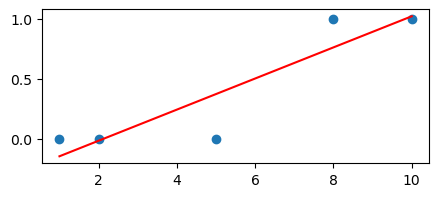

In [119]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1]) # 실제값
lm = stats.linregress(x, y)
list(lm)
H = lm[0]*x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H, 'r')
plt.show()

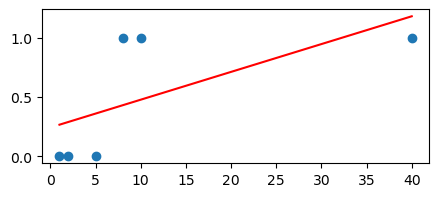

In [120]:
plt.figure(figsize=(5,2))
x = np.array([1, 2, 5, 8, 10, 40])
y = np.array([0, 0, 0, 1, 1, 1]) # 실제값
lm = stats.linregress(x, y)
list(lm)
H = lm[0]*x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H, 'r')
plt.show()

In [129]:
# 교안 pt. 50
x_data = np.array([[10,0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [0],
                   [0],
                   [0]])
# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개인 wight & bias
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%600 == 1:
        print(f"{step}번째 cost:{cost_val}")
print(f'최종 cost:{cost_val}')

1번째 cost:3.7816109657287598
601번째 cost:0.2215089648962021
1201번째 cost:0.17962945997714996
1801번째 cost:0.15530014038085938
2401번째 cost:0.137562558054924
3001번째 cost:0.12354416400194168
3601번째 cost:0.1120392307639122
4201번째 cost:0.10238965600728989
4801번째 cost:0.09417591989040375
5401번째 cost:0.08710464090108871
6001번째 cost:0.08095992356538773
6601번째 cost:0.07557713240385056
7201번째 cost:0.07082808762788773
7801번째 cost:0.0666111633181572
8401번째 cost:0.06284496933221817
9001번째 cost:0.05946340039372444
9601번째 cost:0.056412409991025925
최종 cost:0.054544150829315186


In [135]:
# accuracy
predict = tf.cast(H>0.5, dtype= tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print('모델의 정확도 :',sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100,'%')

모델의 정확도 : 100.0 %


In [136]:
# 모델 사용하기 == 예측하기
input_data = np.array([[10,3]])
sess.run(predict,feed_dict={X:input_data})

array([[1.]], dtype=float32)

# 4. 분류분석
- 종속변수가 2개 이상
- 교안 54pt

In [142]:
x_data = np.array([[10,7, 8, 5],
                   [8, 8, 9, 4],
                   [7, 8, 2, 3],
                   [6, 3, 9, 3],
                   [7, 5, 7, 4],
                   [3, 5, 6, 2],
                   [2, 4, 3, 1]])
y_data = np.array([["A"],
                   ["A"],
                   ["B"],
                   ["B"],
                   ["B"],
                   ["C"],
                   ["C"]])
# 종속변수가 다중분류면 원핫 인코딩
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ls = LabelEncoder()

# labeled_y_data = ls.fit_transform(y_data.ravel())
# onehot_y_data = to_categorical(labeled_y_data)
# onehot_y_data

# 원핫 인코딩 방법2
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd
# ls = LabelEncoder()

# labeled_y_data = ls.fit_transform(y_data.ravel())
# onehot_y_data = pd.get_dummies(labeled_y_data).values
# onehot_y_data

# 원핫 인코딩 방법 3
onehot_y_data = pd.get_dummies(pd.DataFrame(y_data)).values
x_data.shape, onehot_y_data.shape

((7, 4), (7, 3))

In [143]:
x_data # 독립변수

array([[10,  7,  8,  5],
       [ 8,  8,  9,  4],
       [ 7,  8,  2,  3],
       [ 6,  3,  9,  3],
       [ 7,  5,  7,  4],
       [ 3,  5,  6,  2],
       [ 2,  4,  3,  1]])

In [144]:
onehot_y_data # 종속변수

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [150]:
# X, y
X = tf.placeholder(shape=[None,4], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# 독립변수가 4개, 종속변수가 3개인 wight & bias
W = tf.Variable(tf.random_normal([4,3]))
b = tf.Variable(tf.random_normal([3]))

# Hypothesis
logits = tf.matmul(X, W) + b
# H = tf.sigmoid(logits)
H=tf.nn.softmax(logits) # softmax ; 종속변수들의 합이 1

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:onehot_y_data})
    if step%600 == 1:
        print(f"{step}번째 cost:{cost_val}")
print(f'최종 cost:{cost_val}')

1번째 cost:13.261122703552246
601번째 cost:1.6443809270858765
1201번째 cost:1.0108726024627686
1801번째 cost:0.2507726550102234
2401번째 cost:0.04550015181303024
3001번째 cost:0.03958995267748833
3601번째 cost:0.03542215749621391
4201번째 cost:0.03218027949333191
4801번째 cost:0.02953483723104
5401번째 cost:0.027314739301800728
6001번째 cost:0.0254161786288023
6601번째 cost:0.023769918829202652
7201번째 cost:0.02232658676803112
7801번째 cost:0.02104983665049076
8401번째 cost:0.019911672919988632
9001번째 cost:0.01889050379395485
9601번째 cost:0.01796885021030903
최종 cost:0.017404083162546158


In [148]:
# 예측하기
input_data = np.array([[10,7,8,5]])
y_hat = sess.run(H, feed_dict={X:input_data})
print(y_hat)
print(y_hat.argmax(axis=1)) # argmax(axis=1) : 행별 최대값이 있는 index

[[9.6682781e-01 3.3172216e-02 1.9752353e-11]]
[0]


In [155]:
#accuracy 측정
# H : 0.99 0.005 0.005 -> H.argmax -> 0
# y(실제값) : 1 0 0 -> y.argmax -> 0
predict = tf.argmax(H, axis=1)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, tf.argmax(Y, axis=1))
# sess.run(correct, feed_dict={X:x_data, Y:onehot_y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy, feed_dict={X:x_data, Y:onehot_y_data})*100,'%')

100.0 %


# 5. XOR(교안 77pt)

In [157]:
# dataset
x_data = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
y_data = np.array([[0],
                  [1],
                  [1],
                  [0]])

In [187]:
# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개인 wight & bias
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%600 == 1:
        print(f"{step}번째 cost:{cost_val}")
print(f'최종 cost:{cost_val}')

1번째 cost:0.7491270303726196
601번째 cost:0.693351149559021
1201번째 cost:0.6931489706039429
1801번째 cost:0.6931471824645996
2401번째 cost:0.6931471824645996
3001번째 cost:0.6931471824645996
3601번째 cost:0.6931471824645996
4201번째 cost:0.6931471824645996
4801번째 cost:0.6931471824645996
5401번째 cost:0.6931471824645996
6001번째 cost:0.6931471824645996
6601번째 cost:0.6931471824645996
7201번째 cost:0.6931471824645996
7801번째 cost:0.6931471824645996
8401번째 cost:0.6931471824645996
9001번째 cost:0.6931471824645996
9601번째 cost:0.6931471824645996
최종 cost:0.6931471824645996


In [160]:
# accuracy 측정
predict = tf.cast(H>=0.5, dtype= tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print('모델의 정확도 :',sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100,'%')

모델의 정확도 : 75.0 %


# 6. DeepLearning 예제

In [207]:
# dataset
x_data = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
y_data = np.array([[0],
                  [1],
                  [1],
                  [0]])

# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력4)
W1 = tf.Variable(tf.random_normal([2,4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]), name='bias1')
# logits = tf.matmul(X, W1) + b1
# H1 = tf.sigmoid(logits)
layer1 = tf.nn.relu(tf.matmul(X, W1)+b1)

#layer2의 weight & bias (layer2 = 입력4, 출력1)
W2 = tf.Variable(tf.random_normal([4,1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
layer2 = tf.matmul(layer1, W2)+b2
H=tf.sigmoid(layer2)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=layer2, labels=Y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%600 == 1:
        print(f"{step}번째 cost:{cost_val}")
print(f'최종 cost:{cost_val}')

1번째 cost:0.7358455657958984
601번째 cost:0.09513936191797256
1201번째 cost:0.026305872946977615
1801번째 cost:0.014307555742561817
2401번째 cost:0.009631984867155552
3001번째 cost:0.007198526989668608
3601번째 cost:0.005717525724321604
4201번째 cost:0.0047301072627305984
4801번째 cost:0.004020700231194496
5401번째 cost:0.0034955902956426144
6001번째 cost:0.003088539931923151
6601번째 cost:0.0027625118382275105
7201번째 cost:0.002497985027730465
7801번째 cost:0.0022768606431782246
8401번째 cost:0.002092517912387848
9001번째 cost:0.0019350879592821002
9601번째 cost:0.0017979714320972562
최종 cost:0.0017171303043141961


In [208]:
# accuracy 측정
predict = tf.cast(H>=0.5, dtype= tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y_data)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print('모델의 정확도 :',sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100,'%')

모델의 정확도 : 100.0 %


## layer 층을 X2-> 10 -> 20 -> 10 -> y1
                  입력층      hidden layer       출력층


In [206]:
# dataset
x_data = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
y_data = np.array([[0],
                  [1],
                  [1],
                  [0]])

# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력10)
W1 = tf.Variable(tf.random_normal([2,10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1)+b1)

#layer2의 weight & bias (layer2 = 입력10, 출력20)
W2 = tf.Variable(tf.random_normal([10,20]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([20]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2)+b2)

#layer3의 weight & bias (layer3 = 입력20, 출력10)
W3 = tf.Variable(tf.random_normal([20,10]), name = 'weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3)+b3)

#layer4의 weight & bias (입력10, 출력1)
W4 = tf.Variable(tf.random_normal([10,1]), name = 'weight4')
b4 = tf.Variable(tf.random_normal([1]), name= 'bias4')
logits= tf.matmul(layer3, W4)+b4
H = tf.sigmoid(logits)
                 
# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%600 == 1:
        print(f"{step}번째 cost:{cost_val}")
print(f'최종 cost:{cost_val}')

1번째 cost:12.997190475463867
601번째 cost:0.0019859501626342535
1201번째 cost:0.0009149133111350238
1801번째 cost:0.0005866318242624402
2401번째 cost:0.0004288010240998119
3001번째 cost:0.0003365205484442413
3601번째 cost:0.00027772944304160774
4201번째 cost:0.00023738348681945354
4801번째 cost:0.0002069913607556373
5401번째 cost:0.0001833192363847047
6001번째 cost:0.00016435272118542343
6601번째 cost:0.00014961318811401725
7201번째 cost:0.00013846502406522632
7801번째 cost:0.00012884242460131645
8401번째 cost:0.00012024045281577855
9001번째 cost:0.00011269903188804165
9601번째 cost:0.00010600590758258477
최종 cost:0.0001019668416120112


In [209]:
# accuracy 측정
predict = tf.cast(H>=0.5, dtype= tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print('모델의 정확도 :',sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100,'%')

모델의 정확도 : 100.0 %
